In [86]:
import numpy
from numpy import *
import matplotlib.pyplot as plt
import pygments
import scipy

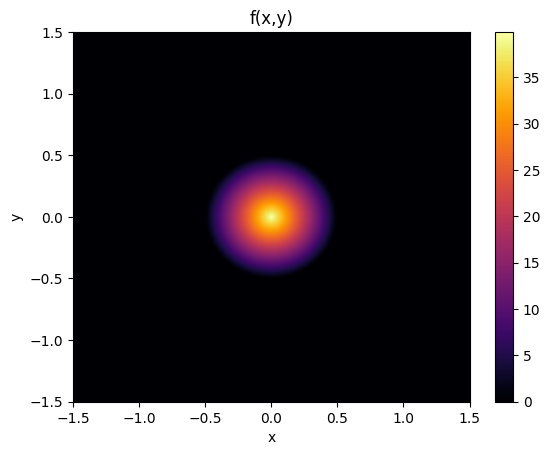

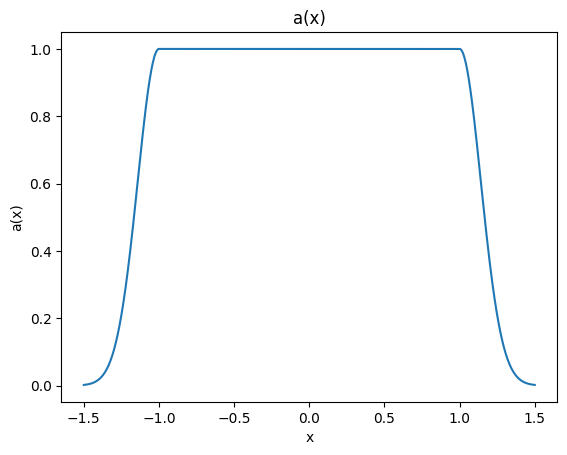

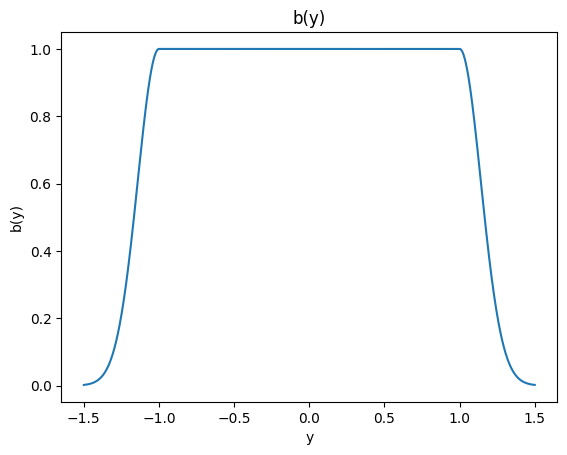

In [89]:
#Apartado h
''' DECLARAMOS LAS VARIABLES COMO GLOBALES '''
n,m,C,kx,ky,hx,hy,x,y=[],[],[],[],[],[],[],[],[]
def calculo_parametros():
    ''' DECLARAMOS QUE VAMOS A UTILIZAR ESTAS VARIABLES EN LA FUNCION '''
    global n,m,C,kx,ky,hx,hy,x,y
    ''' CREAMOS NUESTROS VECTORES ESPACIALES '''
    x=linspace(-1.5,1.5,n+2)
    y=linspace(-1.5,1.5,m+2)
    ''' Y LOS SALTOS '''
    hx=x[1]-x[0]
    hy=y[1]-y[0]
    ''' CREAMOS NUESTRA MALLA (EXPLICACION EN EL .pdf) '''
    xx,yy=meshgrid(x,y)
    ''' EVALUAMOS LA PRIMERA PARTE DE LA FUNCION DEFINIDA A TROZOS Y
    LE QUITAMOS LA PARTE NEGATIVA PARA COMPLETARLA'''
    f=C*(1-2*sqrt(xx**2+yy**2))
    f=maximum(f,zeros(shape(xx)))
    '''MODIFICAMOS LOS VALORES DE NUESTRA MALLA PARA CREAR LAS FUNCIONES a(x) y b(x) '''
    xx[abs(xx)<=1]=1
    yy[abs(yy)<=1]=1
    a=exp(-kx*(abs(xx)-1)**2)
    b=exp(-ky*(abs(yy)-1)**2)
    return a,b,f
def plot_parametros():
    global n,m,C,kx,ky,hx,hy,x,y
    '''PINTAMOS LAS FUNCIONES PARA COMPROBAR QUE LOS RESULTADOS OBTENIDOS HAN SIDO COHERENTES '''
    plt.pcolormesh(x,y,f,cmap='inferno'),plt.xlabel('x'),plt.ylabel('y'),plt.title('f(x,y)'),plt.colorbar()
    plt.show()
    plt.plot(x,a[1,:]),plt.xlabel('x'),plt.ylabel('a(x)'),plt.title('a(x)')
    plt.show()
    plt.plot(y,b[:,1]),plt.xlabel('y'),plt.ylabel('b(y)'),plt.title('b(y)')
    plt.show()
    
def main():
    global n,m,C,kx,ky,hx,hy,x,y
    ''' DAMOS VALORES A LOS PARAMETROS Y EJECUTAMOS LA FUNCION '''
    n,m,C,kx,ky=1000,2000,40,25,25
    a,b,f=calculo_parametros()
    plot_parametros()
if __name__ == '__main__':
	main()  


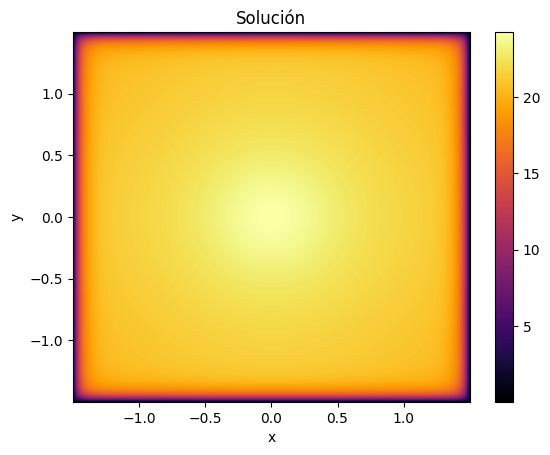

In [91]:
#Apartado i
def matrices_sylvester(a,b,f):
    global n,m,C,kx,ky,hx,hy,x,y
    '''CREAMOS LAS MATRICES DIAGONALES PARA a Y b COMO EXPUSIMOS EN EL APARTADO f '''
    diag_a_s=a[1,2:-1]
    diag_a_p=-a[1,1:-1]-a[1,2:]
    diag_b_s=b[2:-1,1]
    diag_b_p=-b[1:-1,1]-b[2:,1]
    Txx=-1/hx**2*(diag(diag_a_p)+diag(diag_a_s,1)+diag(diag_a_s,-1))
    Tyy=-1/hy**2*(diag(diag_b_p)+diag(diag_b_s,1)+diag(diag_b_s,-1))
    '''LE QUITAMOS A f LA FRONTERA '''
    f=f[1:-1,1:-1]
    return f,Txx,Tyy
def main():
    global n,m,C,kx,ky,hx,hy,x,y
    '''CALCULAMOS LOS PARAMETROS, LAS MATRICES, RESOLVEMOS Y PINTAMOS'''
    a,b,f=calculo_parametros()
    f,Txx,Tyy=matrices_sylvester(a,b,f)
    sol=scipy.linalg.solve_sylvester(Tyy,Txx,f)
    plt.pcolormesh(linspace(x[0]+hx,x[-1]-hx,n),linspace(y[0]+hy,y[-1]-hy,m),sol, cmap = 'inferno') 
    plt.xlabel('x'),plt.ylabel('y'),plt.title('Solución'),plt.colorbar()
    plt.show()
if __name__ == '__main__':
	main()  


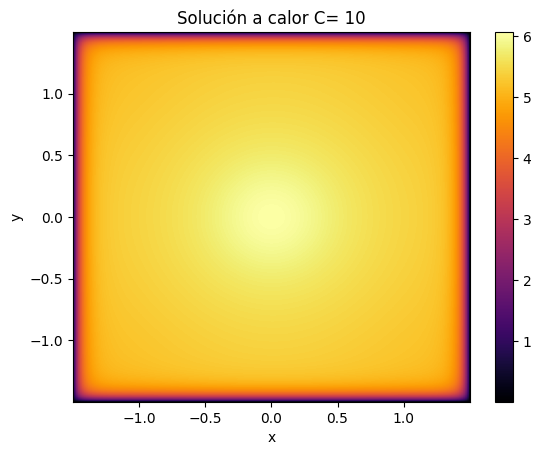

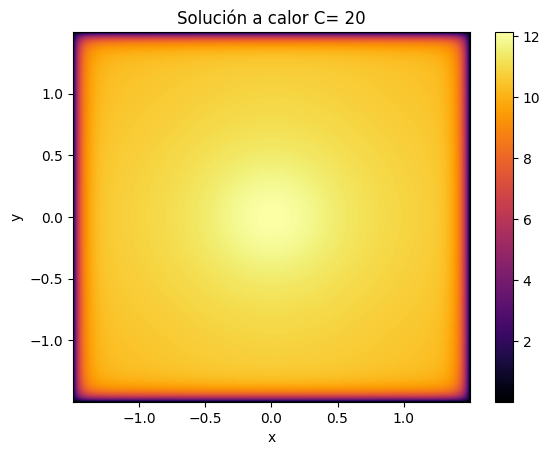

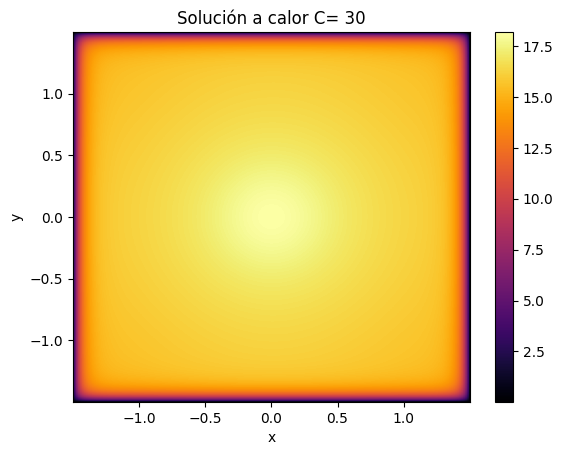

In [94]:
#Apartado j
'''DEFINIMOS UN VECTOR DE CALORES Y UN BUCLE, NOS IREMOS MOVIENDO POR EL BUCLE SACANDO LAS SOLUCIONES'''
calor=[10,20,30]
for i in range(0,len(calor)):
    C=calor[i]
    a,b,f=calculo_parametros()
    f,Txx,Tyy=matrices_sylvester(a,b,f)
    sol=scipy.linalg.solve_sylvester(Tyy,Txx,f)
    plt.pcolormesh(linspace(x[0]+hx,x[-1]-hx,n),linspace(y[0]+hy,y[-1]-hy,m),sol, cmap = 'inferno') 
    plt.xlabel('x'),plt.ylabel('y'),plt.title('Solución a calor C= '+str(C)),plt.colorbar()
    plt.show()


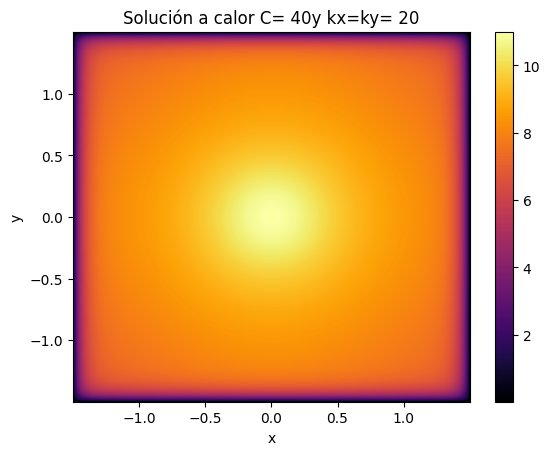

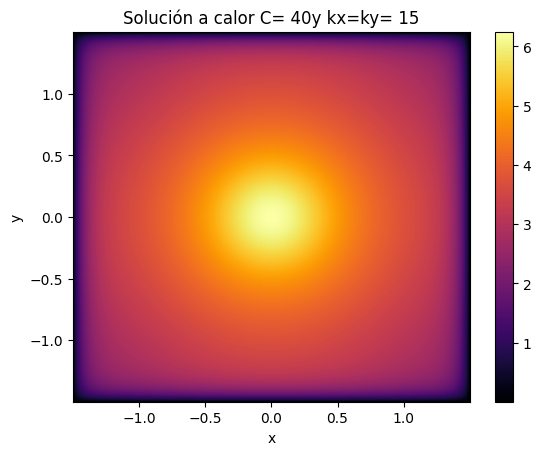

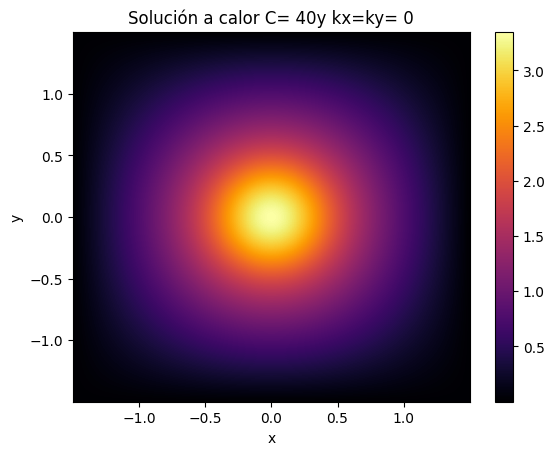

In [97]:
#Apartado I
'''AHORA FIJAMOS EL VALOR DEL CALOR A C=40, Y VAMOS A MODIFICAR LOS VALORES DE kx,ky '''
C=40
k=[20,15,0]
for i in range(0,len(k)):
    kx=k[i]
    ky=k[i]
    a,b,f=calculo_parametros()
    f,Txx,Tyy=matrices_sylvester(a,b,f)
    sol=scipy.linalg.solve_sylvester(Tyy,Txx,f)
    plt.pcolormesh(linspace(x[0]+hx,x[-1]-hx,n),linspace(y[0]+hy,y[-1]-hy,m),sol, cmap = 'inferno') 
    plt.xlabel('x'),plt.ylabel('y'),plt.title('Solución a calor C= '+str(C)+ 'y kx=ky= '+str(k[i])),plt.colorbar()
    plt.show()
